In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(data)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


#### standardize columns 

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

#### check data types

In [5]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [6]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [13]:
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

In [14]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [15]:
tc.isnull().sum()

np.int64(11)

In [16]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [17]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')
df.totalcharges = df.totalcharges.fillna(0)

#### check churn variables

In [18]:
df.churn = (df.churn == 'yes').astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

### Validation Framework w/ sklearn

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [21]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1 )

In [22]:
len(df_full_train), len(df_test)

(5634, 1409)

In [23]:
# 25% size for the test is equivalent to 20% of the entire df
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1 )

In [24]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [25]:
#confirm that the indexes are shuffled
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0


In [26]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [27]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

We didn't removed the target variable from df_full_train for EDA purposes

### EDA

In [28]:
df_full_train = df_full_train.reset_index(drop = True)

In [29]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [30]:
round(df_full_train.churn.value_counts(normalize = True), 2)

churn
0    0.73
1    0.27
Name: proportion, dtype: float64

In [31]:
df_full_train.churn.mean()

np.float64(0.26996805111821087)

Why the mean works the same as value_counts? Because it's a binary so is the sum of 1s divided by n

In [32]:
global_churn_rate = round(df_full_train.churn.mean(), 2)
global_churn_rate

np.float64(0.27)

#### numerical and categorical variables

In [33]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [34]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [35]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [36]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [37]:
df_full_train[categorical].nunique() 

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

We can see some of the categorical variables are binary.

### Feature importance: Churn rate and risk ratio

#### **Churn rate**

Let's look at churn rate in different groups

In [38]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [39]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [40]:
global_churn_rate

np.float64(0.27)

Churn along males and females it is not so different as the global churn

In [41]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [42]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner


np.float64(0.3298090040927694)

In [43]:
global_churn_rate - churn_no_partner

np.float64(-0.0598090040927694)

In [44]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner


np.float64(0.20503330866025166)

In [45]:
global_churn_rate - churn_partner

np.float64(0.06496669133974836)

For gender, it's not relevant if a customer is either male or female. For partner, the difference is more significant. The churn rate for no partner is almost 6% more than the global churn rate.

- **Feature importante note:** Global churn rate - Group churn rate 

If > 0 --> means this group is less likely to churn. 

If < 0 --> this group is more likely to churn

Instead of looking at the difference, we can divide the metrics one by another --> **Risk Ratio**

#### Risk ratio

In [46]:
churn_no_partner / global_churn_rate

# For people without a partner, the churn rate is 22% higher

np.float64(1.22151482997322)

In [47]:
churn_partner / global_churn_rate

# For people without a partner, the churn rate is 25% lower

np.float64(0.7593826246675986)

- **Feature importance:** risk = group/global 

If > 1 --> this group is more likely to churn. 

If < 1 --> group is less likely to churn

In [48]:
df_full_train.groupby('gender').churn.agg(['mean', 'count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [49]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


In [50]:
from IPython.display import display

In [51]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027730,0.897297
1,0.413377,912,0.143377,1.531027




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059809,1.221515
yes,0.205033,2702,-0.064967,0.759383




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043760,1.162074
yes,0.165666,1666,-0.104334,0.613579




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028684,0.893764
yes,0.273049,5087,0.003049,1.011292




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012593,0.953361
no_phone_service,0.241316,547,-0.028684,0.893764
yes,0.290742,2387,0.020742,1.076820




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077653,0.712398
fiber_optic,0.425171,2479,0.155171,1.574709
no,0.077805,1221,-0.192195,0.288167




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150921,1.558967
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.153226,1612,-0.116774,0.567503




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134323,1.497494
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.217232,1915,-0.052768,0.804564




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125875,1.466205
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.230412,1940,-0.039588,0.853379




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148914,1.551534
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.159926,1632,-0.110074,0.592320




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072832,1.269747
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.302723,2167,0.032723,1.121195




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068906,1.255209
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.307273,2200,0.037273,1.138047




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161701,1.598893
one_year,0.120573,1186,-0.149427,0.446568
two_year,0.028274,1344,-0.241726,0.104718




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097929,0.637300
yes,0.338151,3321,0.068151,1.252412




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101829,0.622854
credit_card_(automatic),0.164339,1217,-0.105661,0.608661
electronic_check,0.455890,1893,0.185890,1.688482
mailed_check,0.193870,1305,-0.076130,0.718036


### Feature importance: Mutual Information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another. Meaning that knowing the value of one variable significantly reduces the uncertainty about the other

In [52]:
from sklearn.metrics import mutual_info_score

We need to pass two arguments: the labels we know that are true (target variable) and value of a feature

In [53]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

It tells us how much we learn about churn by absorving the values of contract value, and likewise it tell us how much we learn about the contract variable by absorving the values of churn

In [54]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

Gender is not as informative as contract

In [55]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

Partner is more important than gender but far less important than contract

It's difficult to interpret these numbers, but we can infer from these numbers what the relative importante of these features.

We can apply these to all categorical variables and see which ones have the highest/lowest mutual information

In [56]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

**.apply** takes in a function with one argument and the function **mutual_info_scores** takes two arguments (a series, which will the values of the column we want to analyze, and another series that will be the values of the target variable).

So, we wrap the **mutual_info_score** into a function with one argument so we can use it with **.apply**. We are calling that function **mutual_info_churn_score** and we pass the series as the only argument. That series will be the same used by the **mutual_info_scores**. This work because we apply the function to our dataframe, and it will apply this function **column wise**.


In [57]:
df_full_train[categorical].apply(mutual_info_churn_score)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [58]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Feature importance - Correlation between numerical values

Pearson Correlation - Is a way to measure dependency between two variables.

- r > 0: If a variable increases/decreases, the other follows the same movement
- r < 0: If a variable increases/decreases, the other goes in the opposite direction

---


- [-0.2, 0] and [0, 0.2] - low (rarely)
- [-0.5, -0.2] and [0.2, 0.5] - moderate (sometimes)
- [-1, -0.6] and [0.6, 1] - strong (often/always) 

In [59]:
df_full_train[numerical].corrwith(df_full_train.churn).to_frame('correlation')

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [60]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [61]:
df_full_train[df_full_train.tenure > 2].churn.mean()

np.float64(0.22478269658378816)

In [62]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [63]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

The higher the tenure, the less likely is for a client to churn

In [65]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [66]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [67]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

The higher the montly chargers, there's an increase in the churn rate.

### One-Hot Encoding

In [77]:
from sklearn.feature_extraction import DictVectorizer

In [78]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [79]:
df_train[['gender', 'contract']].iloc[:100].to_dict(orient = 'records')

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [80]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [81]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [75]:
dv = DictVectorizer(sparse = False)  #sparse false to return a np array. Note to look for sparse matrix in google

In [84]:
dv.fit(train_dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [85]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [87]:
# Feature matrix
X_train = dv.fit_transform(train_dicts) # This one step is the same as the two-step dv.fit dv.transform
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]], shape=(4225, 45))

In [88]:
val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')

In [91]:
X_val = dv.transform(val_dicts)  # we don't fit the validation dataset

In [92]:
X_val

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]], shape=(1409, 45))

### Logistic Regression

In [93]:
def sigmoid(z):
   return 1 / (1+ np.exp(-z)) 

In [94]:
z = np.linspace(-7, 7 , 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [95]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

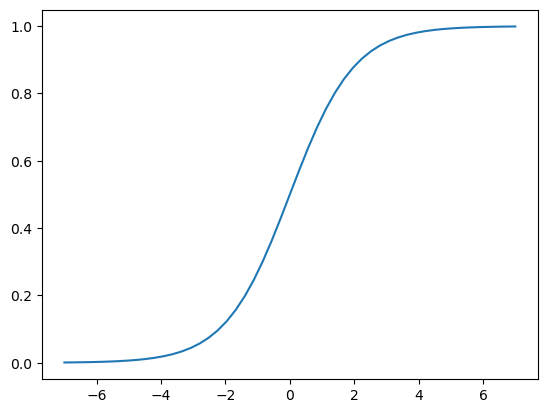

In [97]:
plt.plot(z, sigmoid(z))
plt.show()

In [96]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

The difference between linear and logistic regression, is that we convert the score into a number between 0 and 1. 

### Training Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\filip\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [101]:
model.intercept_[0]  #bias term

np.float64(-0.10904787915455115)

In [103]:
model.coef_ #weights

array([[ 4.75261154e-01, -1.75012513e-01, -4.07939827e-01,
        -2.95925176e-02, -7.80986680e-02,  6.27220103e-02,
        -8.89235039e-02, -8.14896920e-02, -3.43119462e-02,
        -7.33792394e-02, -3.35560864e-01,  3.16793182e-01,
        -8.89235039e-02,  3.66315149e-03, -2.58250655e-01,
         1.41543776e-01,  9.01569307e-03,  6.25632821e-02,
        -8.89235039e-02, -8.13309637e-02,  2.65803781e-01,
        -8.89235039e-02, -2.84571463e-01, -2.31356267e-01,
         1.23665082e-01, -1.66024339e-01,  5.83331536e-02,
        -8.70916147e-02, -3.20893091e-02,  7.05615289e-02,
        -5.90717906e-02,  1.41543776e-01, -2.49234962e-01,
         2.15674832e-01, -1.20484718e-01, -8.89235039e-02,
         1.01717036e-01, -7.09718089e-02, -8.89235039e-02,
         5.22041272e-02,  2.13560964e-01, -8.89235039e-02,
        -2.32328646e-01, -7.04600654e-02,  3.83101014e-04]])

In [104]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.142,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.232, -0.07 ,  0.   ])

In [105]:
model.predict(X_train) #Hard predictions, only predicts 0 or 1

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [109]:
model.predict_proba(X_train) #Soft predictions, predicts the probability --> two dimensional matrix (2 columns - prob of 0 and prob of 1)

# We are only interested in the second column that gives us the probability of churn. Let's do it next on the validation dataset

array([[0.90451342, 0.09548658],
       [0.32060815, 0.67939185],
       [0.36628731, 0.63371269],
       ...,
       [0.46859233, 0.53140767],
       [0.95752005, 0.04247995],
       [0.30114613, 0.69885387]], shape=(4225, 2))

In [110]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00897319, 0.20453829, 0.21227276, ..., 0.13623744, 0.79981493,
       0.8374746 ], shape=(1409,))

In [111]:
churn_decision = (y_pred >= 0.5) 

In [112]:
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [114]:
df_val[churn_decision].customerid  # These are the customers are model thinks that are going to churn

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

Let's see how accurate our predictions are. Tell us how many correct decisions we made

In [115]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [116]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [117]:
(y_val == churn_decision).mean() # 80% of our predictions match

np.float64(0.8034066713981547)

In [118]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [119]:
df_pred

,probability,prediction,actual
0,0.008973,0,0
1,0.204538,0,0
2,0.212273,0,0
3,0.543002,1,1
4,0.213820,0,0
...,...,...,...
1404,0.313596,0,0
1405,0.039292,0,1
1406,0.136237,0,0
1407,0.799815,1,1


In [120]:
df_pred['correct'] = df_pred.prediction == df_pred.actual 

In [121]:
df_pred

,probability,prediction,actual,correct
0,0.008973,0,0,True
1,0.204538,0,0,True
2,0.212273,0,0,True
3,0.543002,1,1,True
4,0.213820,0,0,True
...,...,...,...,...
1404,0.313596,0,0,True
1405,0.039292,0,1,False
1406,0.136237,0,0,True
1407,0.799815,1,1,True


In [122]:
df_pred.correct.mean() # True or false don't need to be explicity convert to int

np.float64(0.8034066713981547)

Our model is 80% correct, in 80% of the cases when the model says a person is goint to churn or not going to churn, the model is correct

### Model interpretation - coeficients

In [123]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.475),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.408),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.336),
 'internetservice=fiber_optic': np.float64(0.317),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.142),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.063),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.266),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

In [124]:
small = ['contract', 'tenure', 'monthlycharges']

In [125]:
df_train[small]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
...,...,...,...
4220,one_year,52,80.85
4221,month-to-month,18,25.15
4222,month-to-month,2,90.00
4223,two_year,27,24.50


In [126]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [127]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [135]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [137]:
X_train_small = dv_small.transform(dicts_train_small)  # feature matrix

# We don't need validation because we only want to look at the coeficients

Train the model

In [138]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [139]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.4779575953986557)

In [140]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [141]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

Bias term: -2.47

contract: 0.971 -0.025 -0.948

monthly_charges: 0.027

tenure: -0.036


A customer with a monthly contract that pays 50 per month and has been with the company for 5 months

-2.47 + 1 * 0.97 + 0 * -0.24 + 0 * -0.948 + 50 * 0.027 + 5 * -0.036

In [142]:
sigmoid(-2.47) # By default, without knowing anything about the customer, the probability of him leaving the company is very small, 7%

np.float64(0.07798823512936635)

In [143]:
sigmoid(-2.47 + 0.97) # Knowing the customer has a monthly contract, the probability of churn got bigger

np.float64(0.18242552380635632)

In [148]:
sigmoid (-2.47 + 0.97 + 50*0.027) # For each extra dollar, the score gets bigger by 0.027

np.float64(0.46257015465625034)

In [145]:
sigmoid (-2.47 + 0.97 + 50*0.027 + 5*-0.036) # For each extra month, the less likely they churn

np.float64(0.41824062315816374)

In [149]:
-2.47 + 0.97 + 50*0.027 + 5*-0.036 # For this particular customer, the raw score is -0.33

-0.3300000000000001

In [145]:
sigmoid(_) # The _ uses the last output and uses it as a parameter

# The probability of churn for this score is 41.8%

np.float64(0.41824062315816374)

The score is -0.33, and our decision threshold to decide if the customer is churning or not is 0.5.

We decided that this customer, is not going to churn and that the probability of churning, given by the sigmoid is 41%

### Using the model

In [156]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

In [157]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_full_train) # Feature matrix

In [158]:
y_full_train = df_full_train.churn.values

In [159]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train) # Train the model

c:\Users\filip\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Repeat the process for the test dataset

In [160]:
dicts_test = df_test[categorical + numerical].to_dict(orient = 'records')

In [161]:
X_test = dv.transform(dicts_test)

In [162]:
y_pred = model.predict_proba(X_test)[:, 1] 

In [163]:
churn_decision = (y_pred >= 0.5)

In [164]:
(churn_decision == y_test).mean() # compute accuracy

np.float64(0.8140525195173882)

Use the model

In [166]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [167]:
X_small_customer = dv.transform([customer])
X_small_customer

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [169]:
model.predict_proba(X_small_customer)[0, 1]  # access the probability of churning

np.float64(0.49537771424106153)

In [170]:
y_test[10]

np.int64(0)

With a 49% we decide the customer is not likely to churn and in fact that's what happened 